In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle

In [21]:
df=pd.read_csv("C:\\Users\\Purushoth\\Desktop\\MCD\\MCD.csv")

In [22]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-14,42.8125,42.8125,41.8750,42.609375,25.207626,3365400
1,2000-01-18,42.3750,42.5000,41.1875,41.500000,24.551327,3401100
2,2000-01-19,41.0000,42.6250,41.0000,42.375000,25.068975,3344700
3,2000-01-20,42.5625,42.5625,41.0000,42.562500,25.179888,3309700
4,2000-01-21,41.6250,41.8750,40.4375,41.062500,24.292494,3722600


In [23]:
df.shape

(5344, 7)

In [24]:
del df['Date'],
del df['Adj Close']

In [25]:
X=df
X=np.array(X.drop(['Close'],1))
y=np.array(df['Close'])

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=250)

In [27]:
xtrain.shape

(4275, 4)

In [28]:
ytrain.shape

(4275,)

In [29]:
xtest.shape


(1069, 4)

In [30]:
ytest.shape

(1069,)

# Random forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [33]:
rf_predictions = rf.predict(xtest)
rf_predictions

array([112.23099957,  53.77330051,  96.00009983, ...,  58.12770046,
        66.7406001 ,  96.71919975])

In [34]:
def mda(ytest:np.ndarray,predicted:np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(ytest[1:]-ytest[:-1])== np.sign(predicted[1:]- predicted[:-1])).astype(int))

In [35]:
def MAPE(ytest:np.ndarray,predicted:np.ndarray):
    """ Mean Absolute Percentage Error """
    mape = np.mean(np.abs((ytest - predicted)/ytest))*100
    return mape

In [64]:
from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, rf_predictions))
print('Mean r2 score:', metrics.r2_score(ytest, rf_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, rf_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, rf_predictions)))
print('Mean Directional Accuracy:', mda(ytest, rf_predictions))
print ('Mean Absolute Percentage Error:', MAPE(ytest,rf_predictions))

a = metrics.mean_absolute_error(ytest, rf_predictions)
b = metrics.mean_squared_error(ytest, rf_predictions)
c = np.sqrt(metrics.mean_squared_error(ytest, rf_predictions))
d = mda(ytest, rf_predictions)
e = MAPE(ytest,rf_predictions)
f= metrics.r2_score(ytest, rf_predictions)

print('%.2f'%a)
print('%.2f'%f)
print('%.2f'%b)
print('%.2f'%c)
print('%.2f'%d)
print('%.2f'%e)

Mean Absolute Error: 0.3755647014406012
Mean r2 score: 0.9998795484687568
Mean Squared Error: 0.3969994663461301
Root Mean Squared Error: 0.6300789365993201
Mean Directional Accuracy: 0.9962546816479401
Mean Absolute Percentage Error: 0.5211655490356882
0.38
1.00
0.40
0.63
1.00
0.52


# Predicting inputs

In [57]:
rf.predict([[230.44,231.66,229.69,2570900]])

array([230.98819858])

# Graph

In [69]:
import matplotlib.pyplot as plt


In [70]:
newdf=pd.read_csv("C:\\Users\\Purushoth\\Desktop\\MCD\\MCD.csv")

In [71]:
newdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-14,42.8125,42.8125,41.8750,42.609375,25.207626,3365400
1,2000-01-18,42.3750,42.5000,41.1875,41.500000,24.551327,3401100
2,2000-01-19,41.0000,42.6250,41.0000,42.375000,25.068975,3344700
3,2000-01-20,42.5625,42.5625,41.0000,42.562500,25.179888,3309700
4,2000-01-21,41.6250,41.8750,40.4375,41.062500,24.292494,3722600


In [72]:
keep_columns=['Open','High','Low','Volume']
newxval=newdf[keep_columns]

In [73]:
predictions = rf.predict(newxval)
# print(list(newdf['Date']))
# print(list(newdf['Close']))
predictions

array([ 42.54361249,  41.69079386,  42.09669986, ..., 231.0211971 ,
       230.98300408, 230.98819858])

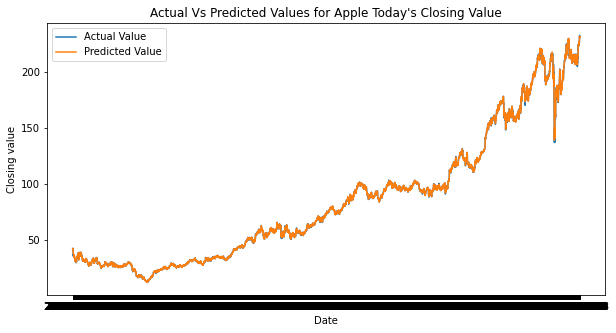

In [74]:
plt.figure(figsize=(10,5))
plt.plot(newdf['Date'],newdf['Close'], label ='Actual Value')
plt.plot(newdf['Date'],predictions, label ='Predicted Value')
plt.xlabel('Date')
plt.ylabel('Closing value')
plt.title("Actual Vs Predicted Values for Apple Today's Closing Value")
plt.legend()

In [75]:
from sklearn.metrics import plot_roc_curve

In [76]:
plot_roc_curve(rf,xtrain,ytrain)

ValueError: RandomForestRegressor should be a binary classifier


# XGBoost

In [51]:
from xgboost import XGBRegressor

In [52]:
xgb = XGBRegressor()
xgb.fit(xtrain,ytrain)

[10:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [53]:
xgb_predictions = xgb.predict(xtest)
xgb_predictions

array([113.78432 ,  53.197014,  96.082275, ...,  57.7536  ,  66.61371 ,
        96.48894 ], dtype=float32)

In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, xgb_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, xgb_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, xgb_predictions)))
print('Mean Directional Accuracy:', mda(ytest, xgb_predictions))
print('Mean r2 score:', metrics.r2_score(ytest, xgb_predictions))

Mean Absolute Error: 0.5195850390100293
Mean Squared Error: 0.5865780304352233
Root Mean Squared Error: 0.7658838230666732
Mean Directional Accuracy: 0.9943820224719101
Mean r2 score: 0.9998220294283772


# SVM

In [47]:
from sklearn.svm import SVR

In [48]:
svm = SVR()
svm.fit(xtrain,ytrain)

SVR()

In [49]:
svm_predictions = svm.predict(xtest)
svm_predictions


array([90.0591807 , 60.33405718, 57.54815616, ..., 56.12025978,
       71.67972183, 68.5929779 ])

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, svm_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, svm_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, svm_predictions)))
print('Mean Directional Accuracy:', mda(ytest, svm_predictions))
print('Mean r2 score:', metrics.r2_score(ytest, svm_predictions))

Mean Absolute Error: 40.81216396677321
Mean Squared Error: 2661.0306186703633
Root Mean Squared Error: 51.58517828475892
Mean Directional Accuracy: 0.6217228464419475
Mean r2 score: 0.1926306207562537
